In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("car.data")
df

,buying,maint,doors,persons,lug_boot,safety,acceptibility
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1728 non-null   object
 1   maint          1728 non-null   object
 2   doors          1728 non-null   object
 3   persons        1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   acceptibility  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.describe(include="all").T

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
lug_boot,1728,3,small,576
safety,1728,3,low,576
acceptibility,1728,4,unacc,1210


In [7]:
for col in df.columns:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
acceptibility
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [8]:
df[df.duplicated()]

,buying,maint,doors,persons,lug_boot,safety,acceptibility


In [9]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

df["buying"] = oe.fit_transform(df[["buying"]])
df["maint"] = oe.fit_transform(df[["maint"]])
df["doors"] = oe.fit_transform(df[["doors"]])
df["persons"] = oe.fit_transform(df[["persons"]])
df["lug_boot"] = oe.fit_transform(df[["lug_boot"]])
df["safety"] = oe.fit_transform(df[["safety"]])
df["acceptibility"] = oe.fit_transform(df[["acceptibility"]])

In [10]:
df

,buying,maint,doors,persons,lug_boot,safety,acceptibility
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.9722222222222222


### Hyperparameter tuning

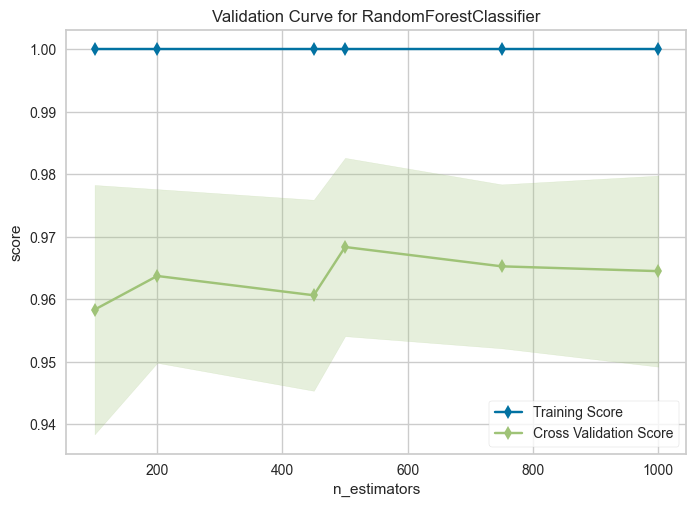

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                estimator=RandomForestClassifier(), param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  750, 1000]),
                scoring='accuracy')


In [24]:
from yellowbrick.model_selection import validation_curve
num_est = [100,200,450,500,750,1000]
print(validation_curve(RandomForestClassifier(),X = X_train, y = y_train, param_name="n_estimators",param_range=num_est,scoring="accuracy", crossvalidation = 3))

##### Estimator parameter is most accurate at 500. Thats the suboptimal point we will use.

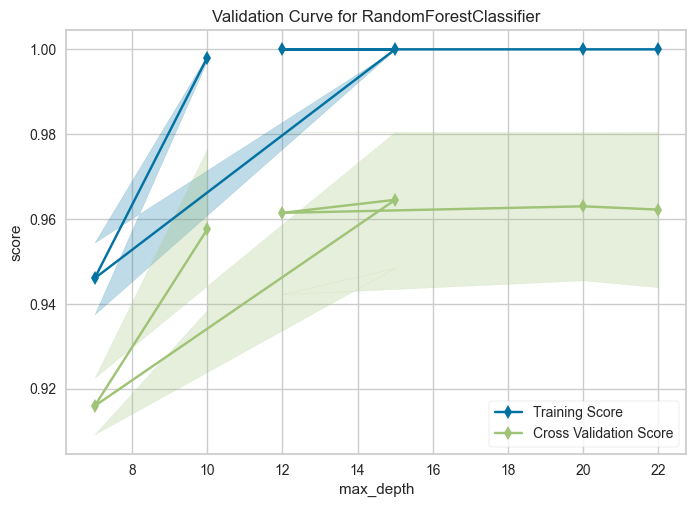

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                estimator=RandomForestClassifier(), param_name='max_depth',
                param_range=array([10,  7, 15, 12, 20, 22]),
                scoring='accuracy')


In [27]:
depth_vals = [10,7,15,12,20,22]
print(validation_curve(RandomForestClassifier(),X = X_train, y = y_train, param_name="max_depth",param_range=depth_vals,scoring="accuracy", crossvalidation = 3))

#### max_depth parameter is most accurate at 15.

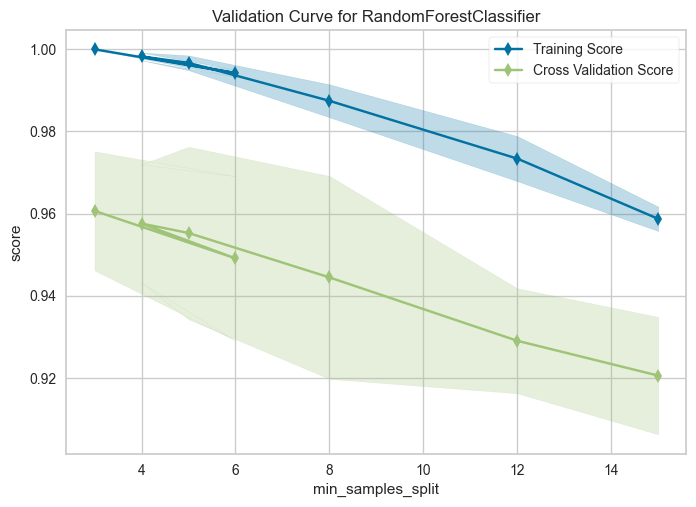

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [23]:
min_samples = [3,6,4,5,8,12,15]
print(validation_curve(RandomForestClassifier(),X = X_train, y = y_train, param_name="min_samples_split",param_range=min_samples,scoring="accuracy", crossvalidation = 3))

#### min_samples_split parameter is most accurate at 3. 

In [67]:
rfc2 = RandomForestClassifier(n_estimators = 500, max_depth = 15, min_samples_split = 3)
rfc2.fit(X_train,y_train)
pred2 = rfc2.predict(X_test)
accuracy2 = accuracy_score(y_test,pred2)
print(accuracy)

0.9722222222222222


#### If we optimize other parameters too, the accuracy of the model will definitely improve.

In [57]:
feature_scores = pd.Series(rfc2.feature_importances_,index = X_train.columns).sort_values(ascending=False)
print(feature_scores)
# Contribute percentages to the predictions of the model

safety      0.288262
persons     0.239796
buying      0.174727
maint       0.147578
lug_boot    0.085053
doors       0.064584
dtype: float64


Text(0.5, 0, 'Feature Importance Score')

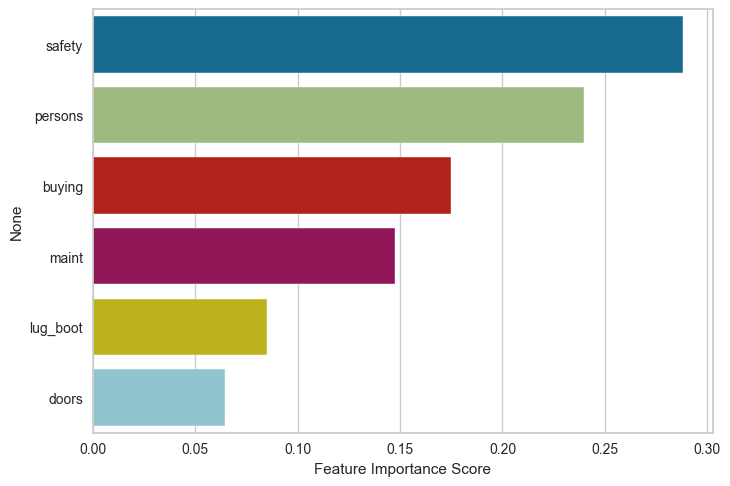

In [64]:
sns.barplot(x = feature_scores, y = feature_scores.keys(),hue = feature_scores.index) # or y = feature_scores.index
plt.xlabel("Feature Importance Score")

In [63]:
# Remove minimal importance features and feed the new data to a new model
rfc3 = RandomForestClassifier()
Xn = df.drop(columns = ["doors","lug_boot","maint"],axis=1)
yn = df["acceptibility"]

Xn_train,Xn_test,yn_train,yn_test = train_test_split(Xn,yn,test_size=0.25)
rfc3.fit(Xn_train,yn_train)
predn = rfc3.predict(Xn_test)
accuracyn = accuracy_score(yn_test,predn)
print(accuracyn)

1.0
